In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('dulieuxettuyendaihoc.csv',
                 header=0,delimiter=','
                 ,encoding='utf-8')

In [3]:
df = df[['T5','T6','NGONNGU',
         'TOANLOGICPHANTICH','GIAIQUYETVANDE']]

In [4]:
df.rename(columns={'TOANLOGICPHANTICH':'LOGIC',
                   'GIAIQUYETVANDE':'UNGXU'}, 
                   inplace=True)

In [5]:
df[['T5','T6']].head(5)

,T5,T6
0,7.4,6.9
1,3.0,4.0
2,4.8,5.7
3,6.1,7.4
4,6.8,8.0


In [6]:
df[['T5','T6']].corr()

,T5,T6
T5,1.000000,0.778683
T6,0.778683,1.000000


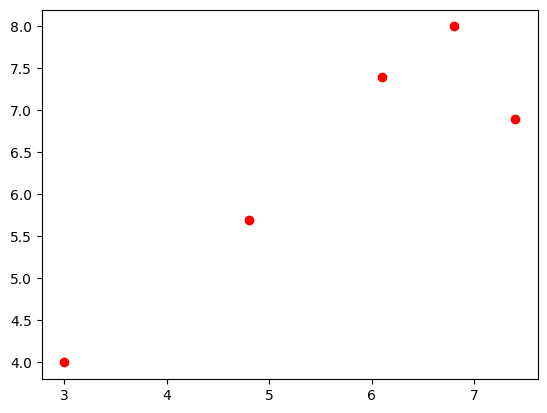

In [7]:
plt.plot(df[['T5']][0:5],df[['T6']][0:5],'ro')
plt.show()

In [8]:
# Xây dựng mô hình trong Machine Learning

# Bước 1: Xác định bài toán
# Bước 2: Xác định input và output
# Bước 3: Xác định mô hình sử dụng
# Bước 4: Chia tập dữ liệu ra thành 2 phần: 
# training và testing theo tỉ lệ 80% và 20%
# Bước 5: Huấn luyện mô hình trên tập training
# Bước 6: Đánh giá mô hình: đánh giá trên tập training và tập test
# Bước 7: Triển khai mô hình

In [9]:
# Lý thuyết về hồi quy tuyến tính
# 1. Phương pháp giải
# https://machinelearningmastery.com/solve-linear-regression-using-linear-algebra/

# 2. Các phương pháp giải tối ưu chi phí tính toán: 
# https://www.kdnuggets.com/2020/09/solving-linear-regression.html

# 3. OLS tối ưu sai số: 
# https://www.analyticsvidhya.com/blog/2023/01/a-comprehensive-guide-to-ols-regression-part-1/

In [10]:
from sklearn.preprocessing import MinMaxScaler
sc=MinMaxScaler()
sc.fit()

TypeError: MinMaxScaler.fit() missing 1 required positional argument: 'X'

In [ ]:
X=df[['T5','T6']].values

X=sc.fit_transform(X)
y=df['NGONNGU'].values
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.1, 
                                                    random_state=10)

In [ ]:

from sklearn import linear_model 

model = linear_model.LinearRegression()
model.fit(X_train,y_train)
print(model.intercept_)
print(model.coef_)

4.0267532534389066
[ 0.67588618 -1.0700418 ]


In [ ]:
LOGIC = 3.05 - 0.11*T5 + 0.287*T6

NameError: name 'T5' is not defined

In [ ]:
pd.DataFrame(X_test).to_csv("input_test.csv")

In [ ]:
pd.DataFrame(y_test).to_csv("output_test.csv")

In [ ]:
pd.DataFrame(y_test_pred).to_csv("output_test_pred.csv")

In [ ]:
import numpy as np
from sklearn import metrics

In [ ]:
y_test_pred = model.predict(X_test)
y_test_pred

array([3.49373364, 3.72350336, 3.8935773 , 4.04754975, 3.9536193 ,
       3.6664861 , 3.87646757, 3.74429986, 3.9304753 , 3.77650285])

In [ ]:
pd.DataFrame(y_test_pred).to_csv("output_test_pred.csv")

Mean Absolute Error: 0.9389937231855778
Mean Squared Error: 1.7926269097774994
Root Mean Squared Error: 1.3388901783856282
Score: -0.7531803518606353


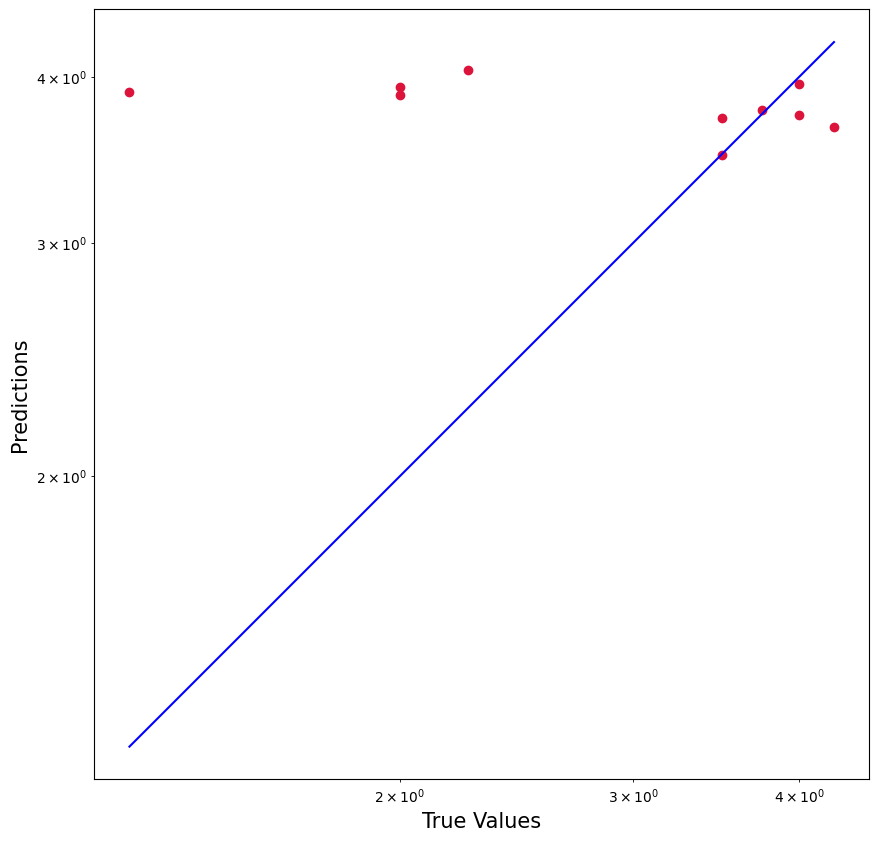

In [ ]:
from sklearn import metrics
import numpy as np
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_test_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_test_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_test_pred)))
print('Score:', model.score(X_test, y_test))
plt.figure(figsize=(10,10))
plt.scatter(y_test, y_test_pred, c='crimson')
plt.yscale('log')
plt.xscale('log')

p1 = max(max(y_test_pred), max(y_test))
p2 = min(min(y_test_pred), min(y_test))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('True Values', fontsize=15)
plt.ylabel('Predictions', fontsize=15)
plt.axis('equal')
plt.show()

In [ ]:
import pickle
pickle.dump(model,open('model_dubao_ngonngu.sv','wb'))


In [ ]:
import pickle
loaded_model=pickle.load(open('model_dubao_ngonngu.sv','rb'))
vT5=float(input("Nhập T5: "))
vT6=float(input('Nhập T6: '))

predicted_vLogic=loaded_model.predict([[vT5,vT6]])
print(f'Dự báo điểm thi NGONNGU là: {predicted_vLogic}')

Dự báo điểm thi NGONNGU là: [108.19541794]


In [ ]:
vT5=6.0
vT6=7.0
scaled =sc.transform([[vT5,vT6]])
predicted_vLogic=loaded_model.predict([[vT5,vT6]])
print(f'Dự báo điểm thi NGONNGU là: {predicted_vLogic}')

Dự báo điểm thi NGONNGU là: [3.72988384]


KeyError: 'SALES'